# Star Wars Survey

This is a data analysis based on the survey released by 538

# Basic Set up

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [103]:
star_wars.head()
# We can find there are some null value in 'respondentID'

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [104]:
# Check the number of NaN in 'RespondentID'
star_wars["RespondentID"].isna().sum()

1

In [105]:
# Since the total number is one, simply remove it
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

# Mapping and Renaming

In [106]:
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts())

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [107]:
# As it will be easier to deal with these Yes or No values if we convert it to True or Flase
yes_no = {"Yes":True, "No":False}
replaced_col = ["Have you seen any of the 6 films in the Star Wars franchise?","Do you consider yourself to be a fan of the Star Wars film franchise?"]
for col in replaced_col:
    star_wars[col] = star_wars[col].map(yes_no)

In [108]:
# Mapping
yes_no_2 = {"Star Wars: Episode I  The Phantom Menace": True,
            np.nan: False,
            "Star Wars: Episode II  Attack of the Clones": True,
            "Star Wars: Episode III  Revenge of the Sith": True,
            "Star Wars: Episode IV  A New Hope": True,
            "Star Wars: Episode V The Empire Strikes Back": True,
            "Star Wars: Episode VI Return of the Jedi": True}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(yes_no_2)

In [109]:
# Renaming
movie_mapping = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
                "Unnamed: 4": "seen_2",
                "Unnamed: 5": "seen_3",
                "Unnamed: 6": "seen_4",
                "Unnamed: 7": "seen_5",
                "Unnamed: 8": "seen_6"}
star_wars.rename(columns = movie_mapping, inplace=True)

In [110]:
# Converting types
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [111]:
rank_mapping = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
                "Unnamed: 10":"ranking_2",
                "Unnamed: 11": "ranking_3",
                "Unnamed: 12": "ranking_4",
                "Unnamed: 13": "ranking_5",
                "Unnamed: 14": "ranking_6"}
star_wars.rename(columns = rank_mapping, inplace=True)

# Ranking

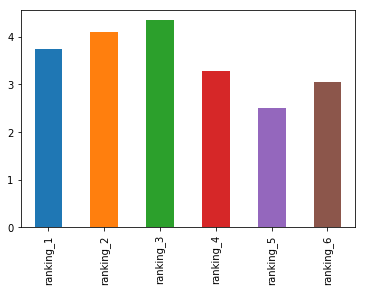

In [112]:
%matplotlib inline
means = star_wars.iloc[:,9:15].mean()
means.plot.bar()

<BarContainer object of 6 artists>

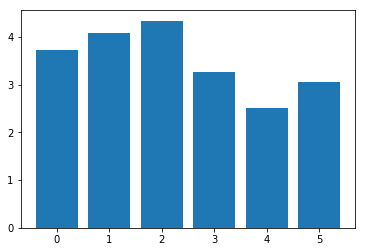

In [113]:
# I prefer the one above
plt.bar(range(6), star_wars.iloc[:,9:15].mean())

Those old movies have higher rankings than the lastest ones

# Watching

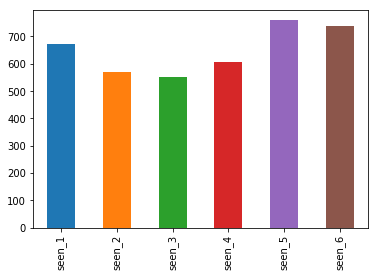

In [114]:
seens =star_wars.iloc[:,3:9].sum()
seens.plot.bar()

<BarContainer object of 6 artists>

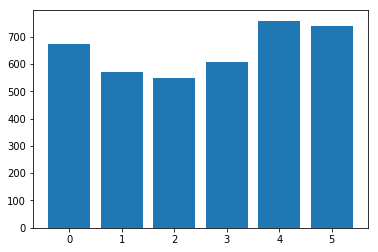

In [115]:
plt.bar(range(6), star_wars.iloc[:,3:9].sum())

Apparently the higher watching times are, the lower rankings are, which makes sense in a way

# Genders

Let's do some interesting splits based on the dataset. First is the gender.

In [116]:
# Splitting the data into two groups by gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [117]:
# By checking the number we found that the number of males is lower that females
print(males.shape[0])
print(females.shape[0])

497
549


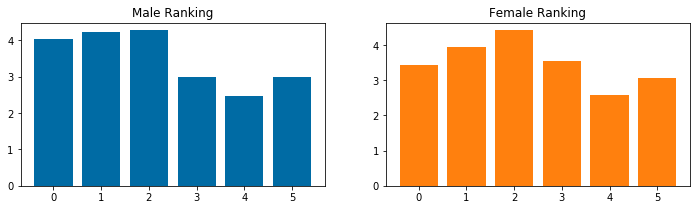

In [118]:
# Same as the ranking and watch part
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 3))
means_1 = males.iloc[:,9:15].mean()
means_2 = females.iloc[:,9:15].mean()
ax_1 = fig.add_subplot(1,2,1)
ax_1.bar(range(6), means_1, color=cb_dark_blue)
ax_1.set_title("Male Ranking")
ax_2 = fig.add_subplot(1,2,2)
ax_2.bar(range(6), means_2, color=cb_orange)
ax_2.set_title("Female Ranking")
plt.show()

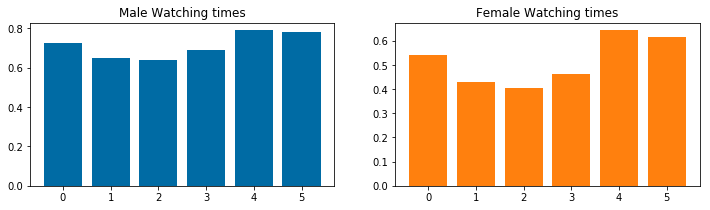

In [119]:
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 3))
means_1 = males.iloc[:,3:9].mean()
means_2 = females.iloc[:,3:9].mean()
ax_1 = fig.add_subplot(1,2,1)
ax_1.bar(range(6), means_1, color=cb_dark_blue)
ax_1.set_title("Male Watching times")
ax_2 = fig.add_subplot(1,2,2)
ax_2.bar(range(6), means_2, color=cb_orange)
ax_2.set_title("Female Watching times")
plt.show()

# Characters

I want to know if male and female have different favortite character

In [120]:
# After checking this column we can find that a lot people don't have a 'valid' answer
star_wars["Which character shot first?"].unique()

array(["I don't understand this question", nan, 'Greedo', 'Han'],
      dtype=object)

In [121]:
shotting_mapping = {"I don't understand this question":"dunno", np.nan:"None",'Greedo':'Greedo','Han':'Han'}
star_wars["Which character shot first?"] = star_wars["Which character shot first?"].map(shotting_mapping)

males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [122]:
print(males[males["Which character shot first?"]=="Greedo"].shape[0])
print(males[males["Which character shot first?"]=="Han"].shape[0])
print(females[females["Which character shot first?"]=="Greedo"].shape[0])
print(females[females["Which character shot first?"]=="Han"].shape[0])

103
200
90
122


# Education

In [123]:
star_wars["Education"].unique()

array(['High school degree', 'Bachelor degree',
       'Some college or Associate degree', nan, 'Graduate degree',
       'Less than high school degree'], dtype=object)

In [124]:
star_wars["Education"].isna().sum()

150

In [126]:
edu_mapping = {np.nan:"None", 
               'High school degree':'High school degree', 
               'Bachelor degree':'Bachelor degree', 
               'Some college or Associate degree':'Some college or Associate degree', 
               'Graduate degree':'Graduate degree',
               'Less than high school degree':'Less than high school degree'}
star_wars["Education"] = star_wars["Education"].map(edu_mapping)

<BarContainer object of 6 artists>

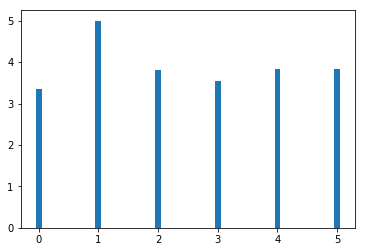

In [128]:
edu_array = ["None", "Less than high school degree", "High school degree", "Some college or Associate degree", "Bachelor degree", "Graduate degree"]
edu_means_ranking_1 = []
for edu in edu_array:
    avg = star_wars[star_wars["Education"] == edu]["ranking_1"].mean()
    edu_means_ranking_1.append(avg)
#print(edu_means_ranking_1)
plt.bar(range(6), edu_means_ranking_1, width=0.1)